In [3]:
import netCDF4 as nc
import os

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import cv2 as cv
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from keplergl import KeplerGl

In [4]:
radiance_data = nc.Dataset(r'input_data\VNP02MOD_NRT.A2020233.1000.001.nc')
geolocation_data = nc.Dataset(r'input_data\VNP03MOD_NRT.A2020233.1000.001.nc')

In [5]:
radiance_data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: VIIRS M-band Reflected Solar Band and Thermal Emissive Band Data
    platform: Suomi-NPP
    instrument: VIIRS
    product_name: VNP02MOD_NRT.A2020233.1000.001.2020233122624.nc
    LocalGranuleID: VNP02MOD_NRT.A2020233.1000.001.2020233122624.nc
    processing_version: v2.0.3
    Conventions: CF-1.6
    institution: NASA Goddard Space Flight Center, VIIRS L1 Processing Group
    license: http://science.nasa.gov/earth-science/earth-science-data/data-information-policy/
    naming_authority: gov.nasa.gsfc.VIIRSland
    date_created: 2020-08-20T08:26:26Z
    ProductionTime: 2020-08-20T08:26:26Z
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    stdname_vocabulary: NetCDF Climate and Forecast (CF) Metadata Convention
    creator_name: VIIRS L1 Processing Group
    creator_email: modis-ops@lists.nasa.gov
    creator_url: http://ladsweb.nascom.nasa.gov
    pro

In [6]:
radiance_data.groups

{'scan_line_attributes': <class 'netCDF4._netCDF4.Group'>
 group /scan_line_attributes:
     dimensions(sizes): 
     variables(dimensions): float64 scan_start_time(number_of_scans), float64 scan_end_time(number_of_scans), float64 ev_mid_time(number_of_scans), uint8 scan_state_flags(number_of_scans), uint8 scan_quality_flags(number_of_scans)
     groups: ,
 'observation_data': <class 'netCDF4._netCDF4.Group'>
 group /observation_data:
     dimensions(sizes): 
     variables(dimensions): uint16 M07(number_of_lines, number_of_pixels), uint16 M07_quality_flags(number_of_lines, number_of_pixels), int8 M07_uncert_index(number_of_lines, number_of_pixels), uint16 M08(number_of_lines, number_of_pixels), uint16 M08_quality_flags(number_of_lines, number_of_pixels), int8 M08_uncert_index(number_of_lines, number_of_pixels), uint16 M10(number_of_lines, number_of_pixels), uint16 M10_quality_flags(number_of_lines, number_of_pixels), int8 M10_uncert_index(number_of_lines, number_of_pixels), uint16 M11

In [7]:
m13_variable = radiance_data['/observation_data/M13']

In [8]:
m13_variable

<class 'netCDF4._netCDF4.Variable'>
uint16 M13(number_of_lines, number_of_pixels)
    long_name: M-band 13 earth view radiance
    units: Watts/meter^2/steradian/micrometer
    _FillValue: 65535
    valid_min: 0
    valid_max: 65527
    scale_factor: 0.008088269
    add_offset: 0.00108056
    flag_values: [65532 65533 65534]
    flag_meanings: Missing_EV Bowtie_Deleted Cal_Fail
path = /observation_data
unlimited dimensions: 
current shape = (3232, 3200)
filling on

In [9]:
print(m13_variable.shape)
print(m13_variable.dimensions)

(3232, 3200)
('number_of_lines', 'number_of_pixels')


In [10]:
m13_array = m13_variable[:]
m13_units = m13_variable.units

In [11]:
geolocation_data.groups

{'scan_line_attributes': <class 'netCDF4._netCDF4.Group'>
 group /scan_line_attributes:
     dimensions(sizes): 
     variables(dimensions): float64 scan_start_time(number_of_scans), float64 scan_end_time(number_of_scans), float64 ev_mid_time(number_of_scans), uint8 HAM_side(number_of_scans), uint8 sensor_mode(number_of_scans), int16 scan_quality(number_of_scans)
     groups: ,
 'geolocation_data': <class 'netCDF4._netCDF4.Group'>
 group /geolocation_data:
     dimensions(sizes): 
     variables(dimensions): float32 latitude(number_of_lines, number_of_pixels), float32 longitude(number_of_lines, number_of_pixels), int16 height(number_of_lines, number_of_pixels), int16 range(number_of_lines, number_of_pixels), int16 sensor_azimuth(number_of_lines, number_of_pixels), int16 sensor_zenith(number_of_lines, number_of_pixels), int16 solar_azimuth(number_of_lines, number_of_pixels), int16 solar_zenith(number_of_lines, number_of_pixels), uint8 land_water_mask(number_of_lines, number_of_pixels), 

In [12]:
latitude_variable = geolocation_data['/geolocation_data/latitude']
longitude_variable = geolocation_data['/geolocation_data/longitude']

In [13]:
print(latitude_variable.shape)
print(latitude_variable.dimensions)
print(longitude_variable.shape)
print(longitude_variable.dimensions)

(3232, 3200)
('number_of_lines', 'number_of_pixels')
(3232, 3200)
('number_of_lines', 'number_of_pixels')


In [14]:
lat_array = latitude_variable[:]
lon_array = longitude_variable[:]

In [15]:
m13_variable

<class 'netCDF4._netCDF4.Variable'>
uint16 M13(number_of_lines, number_of_pixels)
    long_name: M-band 13 earth view radiance
    units: Watts/meter^2/steradian/micrometer
    _FillValue: 65535
    valid_min: 0
    valid_max: 65527
    scale_factor: 0.008088269
    add_offset: 0.00108056
    flag_values: [65532 65533 65534]
    flag_meanings: Missing_EV Bowtie_Deleted Cal_Fail
path = /observation_data
unlimited dimensions: 
current shape = (3232, 3200)
filling on

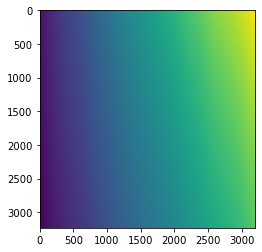

In [16]:
plt.imshow(lon_array)

In [17]:
m13_units

'Watts/meter^2/steradian/micrometer'

In [18]:

latitude_variable.units
longitude_variable.units

'degrees_east'

C:\TheFourthReich\anaconda3\envs\gisenv\lib\site-packages\matplotlib\contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\TheFourthReich\anaconda3\envs\gisenv\lib\site-packages\matplotlib\contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


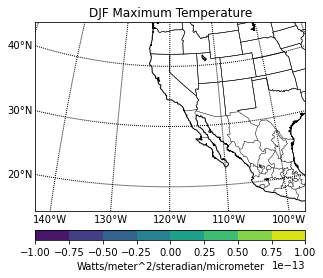

In [21]:
lon_0 = lon_array.mean()
lat_0 = lat_array.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)
# Plot Data
cs = m.contourf(lon_array,lat_array,np.squeeze(m13_array))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(m13_units)

# Add Title
plt.title('DJF Maximum Temperature')

plt.show()

In [19]:
m13_array

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [0.07387498021125793, 0.07387498021125793, 0.07387498021125793,
         ..., 0.12240459769964218, 0.15475767850875854,
         0.1871107518672943],
        ...,
        [0.3407878875732422, 0.3407878875732422, 0.3407878875732422, ...,
         0.0010805600322782993, 0.0010805600322782993,
         0.009168829768896103],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=65535,
  dtype=float32)

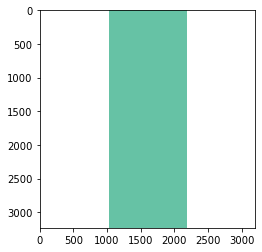

In [23]:
plt.imshow(m13_array, cmap='Set2')

In [24]:
ret, thresh1 = cv.threshold(m13_array, 0.50,1, cv.THRESH_BINARY)
cv.imshow('Thresh',thresh1)
cv.waitKey(0)

13

In [20]:
lon_flatten = list(lon_array.flatten())

In [21]:
lat_flatten = list(lat_array.flatten())

In [22]:
m13_list = list(m13_array.flatten())



In [23]:
fire_location_df = pd.DataFrame({'Fire' : m13_list, 'Longitude' : lon_flatten, 'Latitude' : lat_flatten})
fire_location_df.head()

,Fire,Longitude,Latitude
0,--,-139.746368,47.533764
1,--,-139.724014,47.534237
2,--,-139.701721,47.534702
3,--,-139.679504,47.535152
4,--,-139.657318,47.535599


In [24]:
fire_location_df.at[0,'Longitude']


-139.74637

In [25]:
fire_location_df.loc[fire_location_df['Fire'] == '--']['Fire'] = np.nan

In [26]:
fire_location_df.head()

,Fire,Longitude,Latitude
0,--,-139.746368,47.533764
1,--,-139.724014,47.534237
2,--,-139.701721,47.534702
3,--,-139.679504,47.535152
4,--,-139.657318,47.535599


In [27]:
len(fire_location_df)

10342400

In [28]:
type(m13_list)


list

In [29]:
import numpy.ma as ma

In [30]:
mx = ma.masked_values(m13_array, np.nan)

In [31]:
mx

masked_array(
  data=[[       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [0.07387498, 0.07387498, 0.07387498, ..., 0.1224046 , 0.15475768,
         0.18711075],
        ...,
        [0.3407879 , 0.3407879 , 0.3407879 , ..., 0.00108056, 0.00108056,
         0.00916883],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan]],
  mask=False,
  fill_value=nan,
  dtype=float32)

In [32]:
fire_list_unmasked = list(mx.flatten())

In [33]:
fire_location_df_v1 = pd.DataFrame({'Fire' : fire_list_unmasked, 'Longitude' : lon_flatten, 'Latitude' : lat_flatten})
fire_location_df_v1.head()

,Fire,Longitude,Latitude
0,NaN,-139.746368,47.533764
1,NaN,-139.724014,47.534237
2,NaN,-139.701721,47.534702
3,NaN,-139.679504,47.535152
4,NaN,-139.657318,47.535599


In [34]:
len(fire_location_df_v1)

10342400

In [35]:
fire_location_df_v1.dropna(inplace=True)

In [36]:
len(fire_location_df_v1)

9010816

In [37]:
fire_location_df_v1.head()

,Fire,Longitude,Latitude
1008,0.365053,-126.349487,47.032814
1009,0.356964,-126.334282,47.031361
1010,0.365053,-126.319077,47.029892
1011,0.381229,-126.303902,47.028431
1012,0.365053,-126.288765,47.026970


In [38]:
actual_anomaly = fire_location_df_v1.loc[fire_location_df_v1['Fire'] >= 0.85]
actual_anomaly.head()

,Fire,Longitude,Latitude
612846,1.238586,-119.583046,44.871090
616046,1.562117,-119.591080,44.866467
616047,1.004026,-119.581451,44.864914
882414,1.036379,-111.593269,42.685574
891440,1.141526,-117.921265,43.992130


In [39]:
len(actual_anomaly)

3501

In [40]:
actual_anomaly['geometry'] = [Point(x,y) for x,y in zip(actual_anomaly['Longitude'], actual_anomaly['Latitude'])]
actual_anomaly.head()

C:\TheFourthReich\anaconda3\envs\gisenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Fire,Longitude,Latitude,geometry
612846,1.238586,-119.583046,44.871090,POINT (-119.5830459594727 44.87108993530273)
616046,1.562117,-119.591080,44.866467,POINT (-119.5910797119141 44.8664665222168)
616047,1.004026,-119.581451,44.864914,POINT (-119.5814514160156 44.86491394042969)
882414,1.036379,-111.593269,42.685574,POINT (-111.5932693481445 42.68557357788086)
891440,1.141526,-117.921265,43.992130,POINT (-117.9212646484375 43.99213027954102)


In [41]:
geo = gpd.GeoDataFrame(data=actual_anomaly, geometry=actual_anomaly['geometry'])

In [42]:
geo.crs


In [43]:
geolocation_data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: VIIRS M-band Geolocation Data
    instrument: VIIRS
    product_name: VNP03MOD_NRT.A2020233.1000.001.2020233121620.nc
    LocalGranuleID: VNP03MOD_NRT.A2020233.1000.001.2020233121620.nc
    processing_version: v2.0.3
    Conventions: CF-1.6
    institution: NASA Goddard Space Flight Center, VIIRS L1 Processing Group
    license: http://science.nasa.gov/earth-science/earth-science-data/data-information-policy/
    naming_authority: gov.nasa.gsfc.VIIRSland
    date_created: 2020-08-20T08:16:20Z
    ProductionTime: 2020-08-20T08:16:20Z
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    stdname_vocabulary: NetCDF Climate and Forecast (CF) Metadata Convention
    creator_name: VIIRS L1 Processing Group
    creator_email: modis-ops@lists.nasa.gov
    creator_url: http://ladsweb.nascom.nasa.gov
    project: VIIRS L1 Project
    publisher_name: LAADS
    publis

In [44]:
geo.set_crs(epsg=4326, inplace=True)

,Fire,Longitude,Latitude,geometry
612846,1.238586,-119.583046,44.871090,POINT (-119.58305 44.87109)
616046,1.562117,-119.591080,44.866467,POINT (-119.59108 44.86647)
616047,1.004026,-119.581451,44.864914,POINT (-119.58145 44.86491)
882414,1.036379,-111.593269,42.685574,POINT (-111.59327 42.68557)
891440,1.141526,-117.921265,43.992130,POINT (-117.92126 43.99213)
...,...,...,...,...
6066441,0.858437,-115.831406,32.429142,POINT (-115.83141 32.42914)
6114444,0.850349,-115.837440,32.329426,POINT (-115.83744 32.32943)
6152845,0.850349,-115.855011,32.261822,POINT (-115.85501 32.26182)
6152846,0.850349,-115.843140,32.259171,POINT (-115.84314 32.25917)


In [45]:
geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
base_map_1 = KeplerGl(height=600, width=800)
base_map_1.add_data(data=geo.copy(), name = 'area_of_interest')
base_map_1.save_to_html(file_name=r'output/fire_locations.html')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to output\fire_locations.html!


In [47]:
geo['Fire'].describe()


count    3501.000000
mean        1.907720
std         3.868737
min         0.850349
25%         0.874614
50%         0.915055
75%         1.432704
max        81.328629
Name: Fire, dtype: float64

In [48]:
geo.sort_values(by='Fire')

,Fire,Longitude,Latitude,geometry
6152847,0.850349,-115.831268,32.256527,POINT (-115.83127 32.25653)
4251790,0.850349,-116.809174,36.558914,POINT (-116.80917 36.55891)
4420853,0.850349,-122.222397,37.190510,POINT (-122.22240 37.19051)
4251754,0.850349,-117.248749,36.648998,POINT (-117.24875 36.64900)
4251752,0.850349,-117.273308,36.653980,POINT (-117.27331 36.65398)
...,...,...,...,...
3310314,49.970406,-122.716370,39.624355,POINT (-122.71637 39.62436)
3684779,57.266026,-122.382622,38.778576,POINT (-122.38262 38.77858)
3227116,67.546219,-122.649368,39.791039,POINT (-122.64937 39.79104)
3684778,75.359489,-122.391418,38.779934,POINT (-122.39142 38.77993)
